In [1]:
from wrangle import get_311_data, clean_311, split_separate_scale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")
import os
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# Preparing the notebook by importing necessary modules
# SK Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier, LogisticRegression, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from math import sqrt

# Formatting my notebook
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df= clean_311(get_311_data())

In [4]:
df.head(1)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
551,2017-01-27,2017-02-03,2020-11-19,YES,Customer Service,customer_service,Complaint,Closed,Constituent Call,"2407 WYOMING ST, San Antonio, 78203",2,2142962.0,13699885.0,1393.0,8,-1385.0,174.125,Very Late Response,0,1,0,0,0,0,0,0,0,0,0.086,67656,78203,1,2017,4,19055,59.81


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356804 entries, 551 to 399979
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 356804 non-null  datetime64[ns]
 1   due_date                  356804 non-null  datetime64[ns]
 2   closed_date               356804 non-null  datetime64[ns]
 3   is_late                   356804 non-null  object        
 4   dept                      356804 non-null  object        
 5   call_reason               356804 non-null  object        
 6   case_type                 356804 non-null  object        
 7   case_status               356804 non-null  object        
 8   source_id                 356804 non-null  object        
 9   address                   356804 non-null  object        
 10  council_district          356804 non-null  int64         
 11  longitude                 356804 non-null  float64       
 12  

In [6]:
df.isna().sum()

open_date                   0
due_date                    0
closed_date                 0
is_late                     0
dept                        0
call_reason                 0
case_type                   0
case_status                 0
source_id                   0
address                     0
council_district            0
longitude                   0
latitude                    0
days_open                   0
resolution_days_due         0
days_before_or_after_due    0
pct_time_of_used            0
level_of_delay              0
district_1                  0
district_2                  0
district_3                  0
district_4                  0
district_5                  0
district_6                  0
district_7                  0
district_8                  0
district_9                  0
district_10                 0
voter_turnout_2019          0
num_of_registered_voters    0
zipcode                     0
open_month                  0
open_year                   0
open_week 

In [7]:
df.closed_date.isna().sum()

0

In [8]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = split_separate_scale(df, stratify_by= 'level_of_delay')

In [9]:
train.head(1)

,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,address,council_district,longitude,latitude,days_open,resolution_days_due,days_before_or_after_due,pct_time_of_used,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,voter_turnout_2019,num_of_registered_voters,zipcode,open_month,open_year,open_week,per_capita_income,square_miles
196649,2020-10-19,2020-10-22,2020-10-20,NO,Solid Waste Management,waste,No Pickup,Closed,Web Portal,"1243 CERALVO ST, SAN ANTONIO, 78207",5,2114089.0,13696397.0,2.0,4,2.0,0.5,Early Response,0,0,0,0,1,0,0,0,0,0,0.085,61418,78207,10,2020,43,13836,22.24


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199810 entries, 196649 to 53485
Data columns (total 36 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   open_date                 199810 non-null  datetime64[ns]
 1   due_date                  199810 non-null  datetime64[ns]
 2   closed_date               199810 non-null  datetime64[ns]
 3   is_late                   199810 non-null  object        
 4   dept                      199810 non-null  object        
 5   call_reason               199810 non-null  object        
 6   case_type                 199810 non-null  object        
 7   case_status               199810 non-null  object        
 8   source_id                 199810 non-null  object        
 9   address                   199810 non-null  object        
 10  council_district          199810 non-null  int64         
 11  longitude                 199810 non-null  float64       
 12

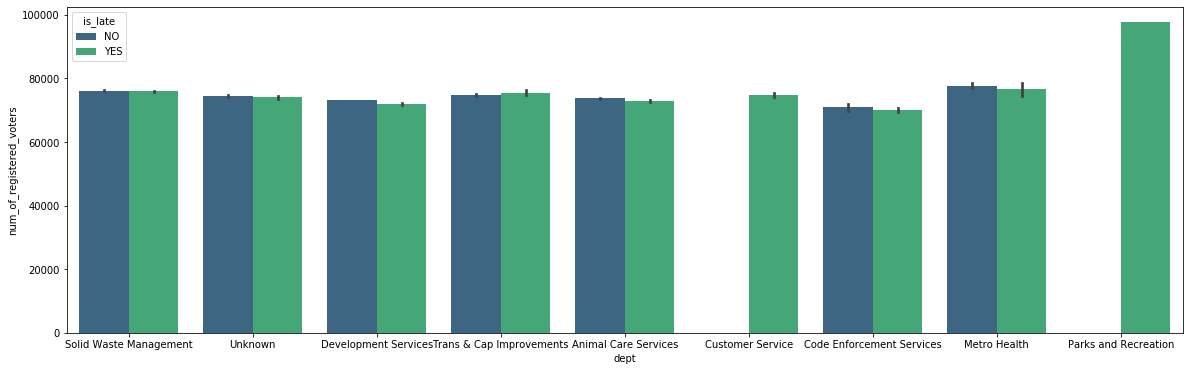

In [11]:
plt.figure(figsize=(20, 6))
sns.barplot(x="dept", y="num_of_registered_voters", hue="is_late", data=train, palette='viridis')

['open_year', 'animal_care_services', 'customer_services', 'solid_waste_management', 'customer_service', 'field', 'misc', '311_mobile_app'] with dummies

['resolution_days_due', 'district_2', 'voter_turnout_2019', 'num_of_registered_voters', 'open_month', 'open_year', 'open_week', 'per_capita_income'] - without dummies

is_late,NO,YES
council_district,,
1,22583,3244
2,21323,5041
3,21439,4220
4,16485,2944
5,24392,3603
6,14818,2375
7,16177,2612
8,9605,1350
9,9716,1141


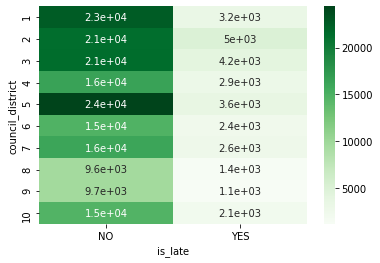

In [12]:
data = pd.crosstab(train.council_district, train['is_late'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

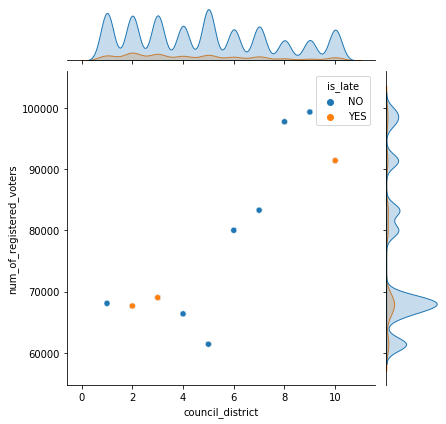

In [13]:
sns.jointplot(data=train, x="council_district", y="num_of_registered_voters", hue='is_late')

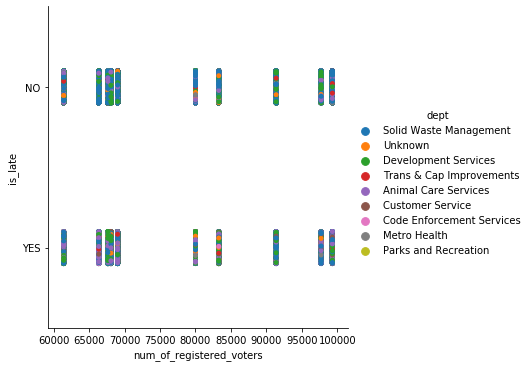

In [14]:
sns.catplot(y="is_late", x="num_of_registered_voters", hue='dept', data=train)

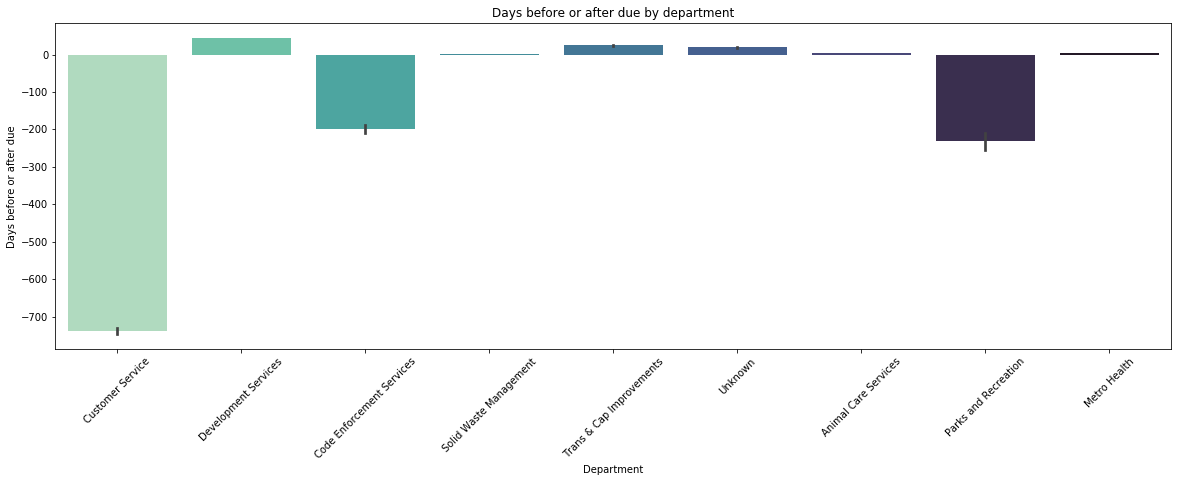

In [34]:
plt.figure(figsize=(20, 6))
sns.barplot( x='dept', y='days_before_or_after_due', data=df, palette='mako_r')
plt.title("Days before or after due by department")
plt.ylabel("Days before or after due")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.show()

### 2 Tailed T-Test Hypothesis Testing #1:
####    $H_0$: Number of registered voters does not affect the number of days open.
####    $H_a$: District 5 has the longest number of days open due to the having the lowest number of registered voters. 
##### alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [15]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = 'the number of registered voters in a district does not affect the number of days open.' # set the null hypothesis

x1 = train[train.council_district == 5].days_open
x2 = train[train.council_district != 5].days_open
t, p= stats.ttest_ind(x1, x2)
if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that the number of registered voters in a district does not affect the number of days open.


### Chi$^2$ Hypothesis Testing #2:
####    $H_0$: Number of registered voters does not affect the level of delay.
####    $H_a$: District 5 has the highest level of delay due to the having the lowest number of registered voters. 
##### alpha ($\alpha$): 1 - confidence level (95% confidence level -> $\alpha = .05$)

In [16]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
null_hypothesis = 'the number of registered voters in a district does not affect the level of delay.' # set the null hypothesis

In [17]:
# make contigency table
contingency_table = pd.crosstab(train.council_district, train.level_of_delay)
# run chi squared test
test_results = stats.chi2_contingency(contingency_table)
# find p value
_, p, _, expected = test_results

#give results of statistical testing
if p > α:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We reject the null hypothesis that the number of registered voters in a district does not affect the level of delay.


# Model 

In [18]:
from model import model_df, model_split_separate_scale

In [19]:
df_1 = model_df()

In [20]:
df_1.head()

,dept,call_reason,source_id,council_district,resolution_days_due,level_of_delay,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,animal_care_services,code_enforcement_services,customer_services,development_services,metro_health,parks_and_rec,solid_waste_management,trans_and_cap_improvements,unknown_dept,buildings,business,cleanup,code,customer_service,field,land,license,misc,storm,streets,trades,traffic,waste,web_portal,311_mobile_app,constituent_call,internal_services_requests
551,Customer Service,customer_service,Constituent Call,2,8,Very Late Response,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
552,Customer Service,customer_service,Constituent Call,4,8,Very Late Response,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
553,Customer Service,customer_service,Constituent Call,2,8,Very Late Response,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
554,Customer Service,customer_service,Constituent Call,1,8,Very Late Response,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
555,Customer Service,customer_service,Constituent Call,6,8,Very Late Response,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, train_scaled, validate_scaled, test_scaled = model_split_separate_scale(df_1)

## Make baseline predictions 

In [22]:
#Making a baseline prediction
df.level_of_delay.value_counts()

Very Early Response    204073
Early Response          66020
Late Response           59998
On Time Response        20987
Very Late Response       5726
Name: level_of_delay, dtype: int64

In [23]:
# set up y_train, y_validate, and y_test as dataframes
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [24]:
#concatenating the baseline prediction to the y_train
y_train['baseline'] = 'Very Early Response'

In [25]:
y_train.head()

,level_of_delay,baseline
196649,Early Response,Very Early Response
192441,Very Early Response,Very Early Response
119552,Very Early Response,Very Early Response
336354,Early Response,Very Early Response
59110,Late Response,Very Early Response


In [26]:
# calculate accuracy of baseline

print(' Baseline Accuracy: {:.2%}'.format(accuracy_score(y_train.level_of_delay, y_train.baseline)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(y_train.baseline, y_train.level_of_delay))
print('---')
print(classification_report(y_train.level_of_delay, y_train.baseline))

 Baseline Accuracy: 57.19%
---
Confusion Matrix
level_of_delay       Very Early Response  Early Response  On Time Response  \
baseline                                                                     
Very Early Response               114280           36971             11753   

level_of_delay       Late Response  Very Late Response  
baseline                                                
Very Early Response          33599                3207  
---
                     precision    recall  f1-score   support

     Early Response       0.00      0.00      0.00     36971
      Late Response       0.00      0.00      0.00     33599
   On Time Response       0.00      0.00      0.00     11753
Very Early Response       0.57      1.00      0.73    114280
 Very Late Response       0.00      0.00      0.00      3207

           accuracy                           0.57    199810
          macro avg       0.11      0.20      0.15    199810
       weighted avg       0.33      0.57      0.42  

In [27]:
X_train.columns

Index(['dept', 'call_reason', 'source_id', 'council_district',
       'resolution_days_due', 'district_1', 'district_2', 'district_3',
       'district_4', 'district_5', 'district_6', 'district_7', 'district_8',
       'district_9', 'district_10', 'animal_care_services',
       'code_enforcement_services', 'customer_services',
       'development_services', 'metro_health', 'parks_and_rec',
       'solid_waste_management', 'trans_and_cap_improvements', 'unknown_dept',
       'buildings', 'business', 'cleanup', 'code', 'customer_service', 'field',
       'land', 'license', 'misc', 'storm', 'streets', 'trades', 'traffic',
       'waste', 'web_portal', '311_mobile_app', 'constituent_call',
       'internal_services_requests'],
      dtype='object')

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199810 entries, 196649 to 53485
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   dept                        199810 non-null  object
 1   call_reason                 199810 non-null  object
 2   source_id                   199810 non-null  object
 3   council_district            199810 non-null  int64 
 4   resolution_days_due         199810 non-null  int64 
 5   district_1                  199810 non-null  uint8 
 6   district_2                  199810 non-null  uint8 
 7   district_3                  199810 non-null  uint8 
 8   district_4                  199810 non-null  uint8 
 9   district_5                  199810 non-null  uint8 
 10  district_6                  199810 non-null  uint8 
 11  district_7                  199810 non-null  uint8 
 12  district_8                  199810 non-null  uint8 
 13  district_9               

In [38]:
y_train.shape

(199810, 2)

In [29]:
X_train.drop(columns=['dept', 'call_reason', 'source_id' ], inplace=True)
X_validate.drop(columns=['dept', 'call_reason', 'source_id'], inplace=True)
X_test.drop(columns=['dept', 'call_reason', 'source_id'], inplace=True)

### First Ridge Classifier

In [35]:
# create the model object
generic_clf = RidgeClassifier(random_state=123)

In [56]:
# fit to train only
generic_clf.fit(X_train, y_train.level_of_delay)
y_pred = generic_clf.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of the first Ridge classifier on training set:', generic_clf.score(X_train, y_train.level_of_delay))

Accuracy of the first Ridge classifier on training set: 0.5891446874530805


In [ ]:
def generic_ridge_classifier():
    '''This function runs a generic ridge classifier model on the x train and y train.level of delay to determine accuracy of predicting if a call reason is early.'''
    # create the model object
    generic_clf = RidgeClassifier(random_state=123)
    # fit to train only
    generic_clf.fit(X_train, y_train.level_of_delay)
    y_pred = generic_clf.predict(X_train)
    # evaluate with score, returns the mean accuracy on the given test data and labels
    print('Accuracy of Ridge Classifier on training set:', generic_clf.score(X_train, y_train.level_of_delay))

### Second Ridge Classifier

In [40]:
class_weight_clf = RidgeClassifier(class_weight="balanced", solver='auto', random_state=123)

In [57]:
# fit to train only
class_weight_clf.fit(X_train, y_train.level_of_delay)
y_pred = class_weight_clf.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of the second Ridge classifier on training set:', class_weight_clf.score(X_train, y_train.level_of_delay))

Accuracy of the second Ridge classifier on training set: 0.35036284470246737


In [ ]:
def class_wt_clf():
    '''This function runs a ridge classifier model  with the class weight changed to balanced and using an auto solver for the hyperparameters on the x train and y train.level of delay to determine accuracy of predicting if a call reason is early.'''
    class_weight_clf = RidgeClassifier(class_weight="balanced", solver='auto', random_state=123)
    # fit to train only
    class_weight_clf.fit(X_train, y_train.level_of_delay)
    y_pred = class_weight_clf.predict(X_train)
    # evaluate with score, returns the mean accuracy on the given test data and labels
    print('Accuracy of Ridge classifier on training set:', class_weight_clf.score(X_train, y_train.level_of_delay))

### Third Ridge Classifier

In [42]:
# create the model object
clf2 = RidgeClassifier(solver='sag',random_state=123)

In [ ]:
# fit to train only
clf2.fit(X_train, y_train.level_of_delay)
y_pred = clf2.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of the third Ridge classifier on training set:', clf2.score(X_train, y_train.level_of_delay))

### First Ridge Classifier CV

In [44]:
clf_cv = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])

In [55]:
# fit to train only
clf_cv.fit(X_train, y_train.level_of_delay)
y_pred = clf_cv.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of the first Ridge classifier CV on training set:', clf_cv.score(X_train, y_train.level_of_delay))

Accuracy of the first Ridge classifier CV on training set: 0.5891446874530805


### Second Ridge Classifier CV

In [46]:
clf_cv2=RidgeClassifierCV(fit_intercept=True, normalize=True, scoring=None, cv=None, class_weight= 'balanced', store_cv_values=True)

In [54]:
# fit to train only
clf_cv2.fit(X_train, y_train.level_of_delay)
y_pred = clf_cv2.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of the second Ridge classifier CV on training set:', clf_cv2.score(X_train, y_train.level_of_delay))

Accuracy of the second Ridge classifier CV on training set: 0.36102297182323206


### Third Ridge Classifier CV

In [48]:
clf_cv3=RidgeClassifierCV()

In [52]:
# fit to train only
clf_cv3.fit(X_train, y_train.level_of_delay)
y_pred = clf_cv3.predict(X_train)
# evaluate with score, returns the mean accuracy on the given test data and labels
print('Accuracy of the third Ridge classifier CV on training set:', clf_cv3.score(X_train, y_train.level_of_delay))

Accuracy of the third Ridge classifier CV on training set: 0.5891446874530805
